# Process Defintion

I have divide my project in three parts:
1.Data Collection
    2.DataSet Creation
    3.Data Preprocess
    4.Model Training 
    5.Model Testing

# Data Collection

In the below code the two important libs are os and cv, os is used to access storage system and create directories,
while cv is used to access camera and capture images of hands

In [36]:
import os
import cv2

# Setting up the directory to store training data
DATA_DIR = './dataTrain'  # ./dataTrain will be the name of my directory that will contain images
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

# Number of gesture classes and dataset size
number_of_classes = 3  # since I am going to predict three gestures, I need to create 3 dirs for each gesture's image
dataset_size = 100  # each class will have 100 images

# Initialize video capture from the default camera
cap = cv2.VideoCapture(0)
for j in range(number_of_classes):
    # Create a directory for each gesture class
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data for class {}'.format(j))  # Informing which class data is being collected

    done = False
    # Waiting for the user to get ready and press 'Q' to start data collection
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Ready? Press "Q" ! :)', (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'):
            break

    counter = 0
    # Capturing 'dataset_size' number of images for the current gesture class
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)
        # Save the captured image to the appropriate directory
        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)

        counter += 1

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [37]:
# Setting up the directory to store testing data
DATA_DIR = './dataTest'  # ./dataTest will be the name of my directory that will contain images for testing
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

# Number of gesture classes and dataset size
number_of_classes = 3  # since I am going to predict three gestures, I need to create 3 dirs for each gesture's image
dataset_size = 100  # each class will have 100 images

# Initialize video capture from the default camera
cap = cv2.VideoCapture(0)
for j in range(number_of_classes):
    # Create a directory for each gesture class
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data for class {}'.format(j))  # Informing which class data is being collected

    done = False
    # Waiting for the user to get ready and press 'Q' to start data collection
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Ready? Press "Q" ! :)', (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'):
            break

    counter = 0
    # Capturing 'dataset_size' number of images for the current gesture class
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)
        # Save the captured image to the appropriate directory
        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)

        counter += 1

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


# Data Set  Creation

In [15]:
#importing important libraries
!pip install mediapipe opencv-python
import mediapipe as mp # we have imported mediapipe for landmark detection on hands
import matplotlib.pyplot as plt

In [5]:
#Verifying the data classes

Now i will plot an image from each class to verify the directories

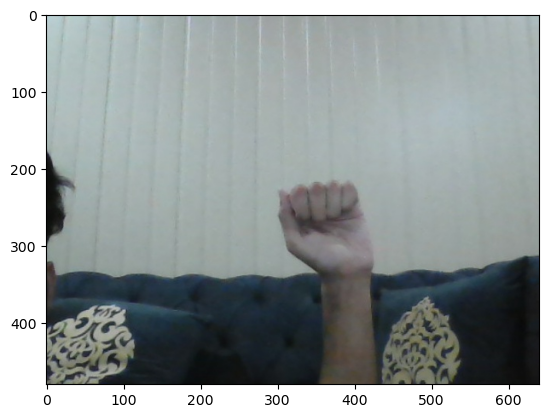

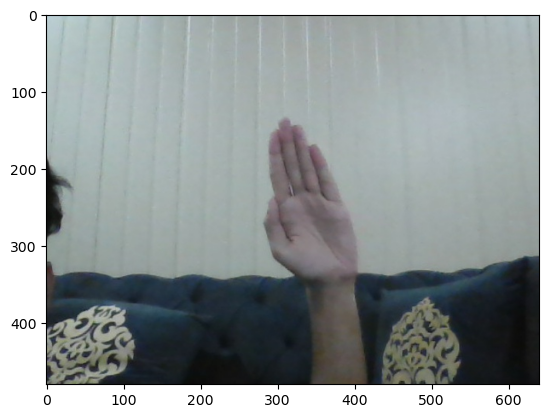

In [16]:
DATA_DIR = './dataTrain'
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR,dir_))[:1]:
        img=cv2.imread(os.path.join(DATA_DIR,dir_,img_path))
        img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(img_rgb)
plt.show()

Visuallizing landmarks on hands

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


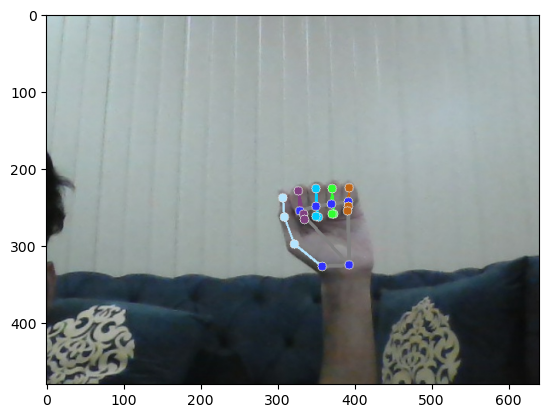

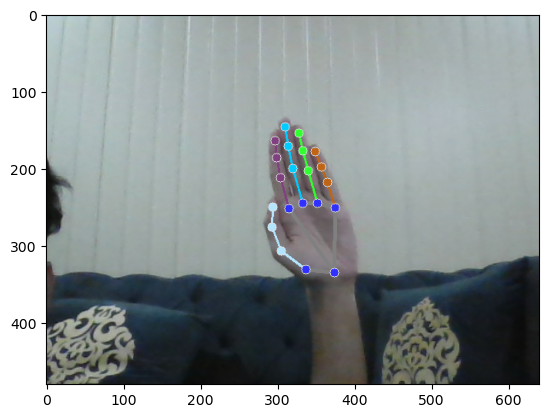

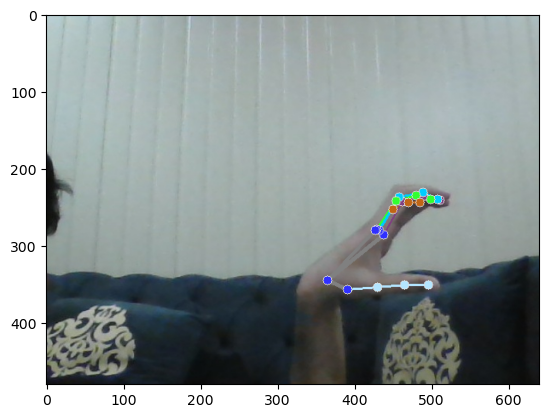

In [17]:
#Checking for landmark detection
DATA_DIR = './dataTrain'
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR,dir_))[:1]:
        img=cv2.imread(os.path.join(DATA_DIR,dir_,img_path))
        img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
                
        plt.figure()
        plt.imshow(img_rgb)
plt.show()

Lets visualize the indices on each part of hand

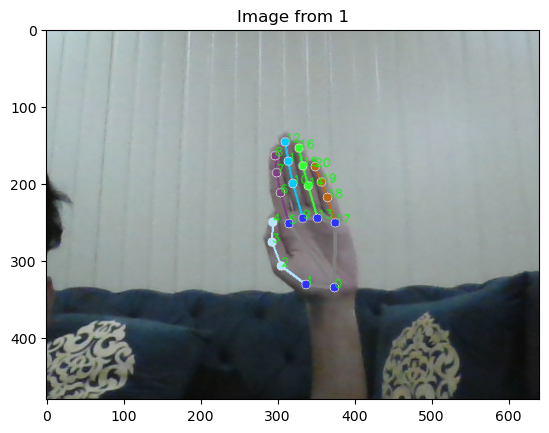

In [18]:


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# Get the list of directories
dirs = os.listdir(DATA_DIR)

# Process only the second directory if it exists
if len(dirs) > 1:
    second_dir = dirs[1]
    for img_path in os.listdir(os.path.join(DATA_DIR, second_dir))[:1]:
        img = cv2.imread(os.path.join(DATA_DIR, second_dir, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())

                for i, landmark in enumerate(hand_landmarks.landmark):
                    x = int(landmark.x * img.shape[1])
                    y = int(landmark.y * img.shape[0])
                    cv2.putText(img_rgb, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

        plt.figure()
        plt.imshow(img_rgb)
        plt.title(f'Image from {second_dir}')

plt.show()


Visualizing CoOrdinates on each indice

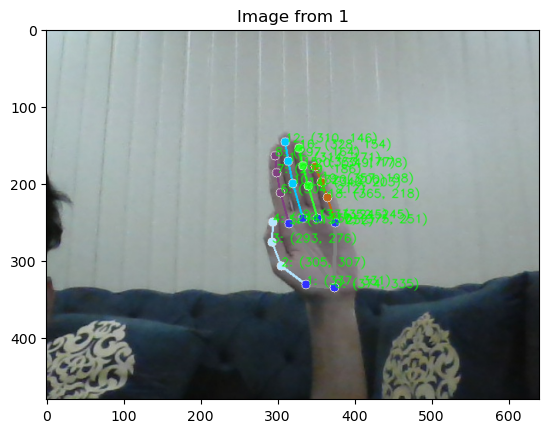

In [19]:
#coordinates
DATA_DIR = './dataTrain'

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)


dirs = os.listdir(DATA_DIR)


if len(dirs) > 1:
    second_dir = dirs[1]
    for img_path in os.listdir(os.path.join(DATA_DIR, second_dir))[:1]:
        img = cv2.imread(os.path.join(DATA_DIR, second_dir, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())

                for i, landmark in enumerate(hand_landmarks.landmark):
                    x = int(landmark.x * img.shape[1])
                    y = int(landmark.y * img.shape[0])
                    text = f'{i}: ({x}, {y})'
                    cv2.putText(img_rgb, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

        plt.figure()
        plt.imshow(img_rgb)
        plt.title(f'Image from {second_dir}')

plt.show()

Creating two dataset, 1. Dataset For Training 2. Dataset For Testing

In [66]:
#Training DataSet
import pickle
import numpy as np

# Initialize MediaPipe Hands solution
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Setup Hands object with static image mode and minimum detection confidence
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)  
# min_detection_confidence sets the threshold for the minimum confidence value for the hand landmarks to be considered detected.

# Directory containing the training data
DATA_DIR = './dataTrain'

# Lists to hold data and labels
data = []
labels = []

# Iterate through each subdirectory in the data directory (each subdirectory represents a class)
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []  # List to hold the landmark coordinates for each image

        # Lists to hold x and y coordinates for normalization
        x_ = []
        y_ = []

        # Read the image from the current path
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        # Convert the image to RGB as MediaPipe uses RGB images
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        # OpenCV reads images in BGR format by default, while MediaPipe expects images in RGB format.

        # Get hand landmarks from the image
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            # Iterate over the detected hand landmarks
            for hand_landmarks in results.multi_hand_landmarks:
                # Extract x and y coordinates from each landmark
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                # Normalize coordinates to fit within a 0-1 range
                min_x, max_x = min(x_), max(x_)
                min_y, max_y = min(y_), max(y_)

                for i in range(len(hand_landmarks.landmark)):
                    # Normalize each x and y coordinate
                    x = (hand_landmarks.landmark[i].x - min_x) / (max_x - min_x)
                    y = (hand_landmarks.landmark[i].y - min_y) / (max_y - min_y)
                    # Append the normalized coordinates to data_aux
                    data_aux.append(x)
                    data_aux.append(y)

            # Append the normalized landmark data to the main data list
            data.append(data_aux)
            # Append the label (class) to the labels list
            labels.append(dir_)

# Find the maximum length of data_aux entries to ensure uniformity in length
max_len = max(len(d) for d in data)

# Pad each data entry with zeros to ensure all entries have the same length
data = [d + [0] * (max_len - len(d)) for d in data]  
# Padding ensures that all data entries have the same length, which is required for most machine learning models.

# Convert the lists to numpy arrays for better performance and compatibility
data = np.array(data)
labels = np.array(labels)

# Save the data and labels to a pickle file for later use
with open('dataTrain.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)


C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [67]:
#Testing DataSet
import pickle
import numpy as np

# Initialize MediaPipe Hands solution
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Setup Hands object with static image mode and minimum detection confidence
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)  
# min_detection_confidence sets the threshold for the minimum confidence value for the hand landmarks to be considered detected.

# Directory containing the training data
DATA_DIR = './dataTest'

# Lists to hold data and labels
data = []
labels = []

# Iterate through each subdirectory in the data directory (each subdirectory represents a class)
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []  # List to hold the landmark coordinates for each image

        # Lists to hold x and y coordinates for normalization
        x_ = []
        y_ = []
    
        # Read the image from the current path
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        # Convert the image to RGB as MediaPipe uses RGB images
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        # OpenCV reads images in BGR format by default, while MediaPipe expects images in RGB format.

        # Get hand landmarks from the image
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            # Iterate over the detected hand landmarks
            for hand_landmarks in results.multi_hand_landmarks:
                # Extract x and y coordinates from each landmark
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                # Normalize coordinates to fit within a 0-1 range
                min_x, max_x = min(x_), max(x_)
                min_y, max_y = min(y_), max(y_)

                for i in range(len(hand_landmarks.landmark)):
                    # Normalize each x and y coordinate
                    x = (hand_landmarks.landmark[i].x - min_x) / (max_x - min_x)
                    y = (hand_landmarks.landmark[i].y - min_y) / (max_y - min_y)
                    # Append the normalized coordinates to data_aux
                    data_aux.append(x)
                    data_aux.append(y)

            # Append the normalized landmark data to the main data list
            data.append(data_aux)
            # Append the label (class) to the labels list
            labels.append(dir_)

# Find the maximum length of data_aux entries to ensure uniformity in length
max_len = max(len(d) for d in data)

# Pad each data entry with zeros to ensure all entries have the same length
data = [d + [0] * (max_len - len(d)) for d in data]  
# Padding ensures that all data entries have the same length, which is required for most machine learning models.

# Convert the lists to numpy arrays for better performance and compatibility
data = np.array(data)
labels = np.array(labels)

# Save the data and labels to a pickle file for later use
with open('dataTest.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)


Checking DataSet Format:

In [28]:

import pickle
# Path to the pickle file
test_pickle_file_path = './datasets/dataTest.pickle'
train_pickle_file_path='./datasets/dataTrain.pickle'

# Open the pickle file in read-binary mode
with open(train_pickle_file_path, 'rb') as file:
    # Deserialize the data
    train_dataset = pickle.load(file)
with open(test_pickle_file_path, 'rb') as file:
    # Deserialize the data
    test_dataset = pickle.load(file)
# Extract data and labels from the deserialized dictionary
train_data = train_dataset['data']
train_labels = train_dataset['labels']
test_data = test_dataset['data']
test_labels = test_dataset['labels']

# Dictionary to store one entry per label
unique_entries = {}

# Iterate through the data and labels to find one entry per label
for i in range(len(train_data)):
    label = train_labels[i]
    if label not in unique_entries:
        unique_entries[label] = train_data[i]

# Display one entry for each label
print("One entry from each label:")
for label, entry in unique_entries.items():
    print(f"Label: {label}")
    print(f"Data: {entry}")
    print("-" * 40)


One entry from each label:
Label: 0
Data: [1.         0.98385087 0.5899079  1.         0.17842466 0.72231674
 0.01853954 0.37497994 0.         0.12924708 0.26031934 0.28874388
 0.23678114 0.03897212 0.30953974 0.33518098 0.32216564 0.39805802
 0.50101226 0.23813884 0.49612064 0.00664422 0.53653853 0.36908463
 0.50606155 0.35818453 0.73603716 0.20778536 0.7471902  0.00665565
 0.76455758 0.33282173 0.74385095 0.3335417  0.99369593 0.17897573
 0.99848139 0.         0.99046018 0.23636545 0.97577112 0.29139253]
----------------------------------------
Label: 1
Data: [0.99783589 1.         0.53492685 0.97887212 0.14157133 0.84742671
 0.         0.68833092 0.01230455 0.54775109 0.2629157  0.56119901
 0.12799875 0.34482717 0.07638871 0.20971904 0.05047897 0.09374703
 0.48368476 0.52138805 0.32713071 0.28450622 0.25280011 0.1317274
 0.20354953 0.         0.72280794 0.52247652 0.57804532 0.29988683
 0.49217047 0.16143132 0.42574585 0.04043354 1.         0.5560794
 0.87741551 0.38109535 0.7806910

now that we can see for each nested list there are a total of 42 coordinates that represents that for each hand there are
 21 landmarks and 2 co-ordinates('x and y') per landmark no 2*21=42 , that means each image will be classified on the basis
of these 42 co-ordinate values

In [4]:
#Checking Data Consistency and Distribution
import pandas as pd

# Function to check data consistency
def check_consistency(data):
    length = len(data[0])
    for item in data:
        if len(item) != length:
            return False
    return True

# Function to check data balance
def check_balance(labels):
    label_counts = pd.Series(labels).value_counts()
    print("Class distribution:")
    print(label_counts)
    return label_counts



data = train_data

labels = train_labels

# Check data consistency
consistent = check_consistency(train_data)
if not consistent:
    print("Data is not consistent in length.")
else:
    print("Data is consistent in length.")

# Check data balance
label_counts = check_balance(train_labels)
print("---------------------------------")
consistent = check_consistency(test_data)
if not consistent:
    print("Data is not consistent in length.")
else:
    print("Data is consistent in length.")

# Check data balance
label_counts = check_balance(test_labels)


Data is consistent in length.
Class distribution:
2    100
1     81
0     61
Name: count, dtype: int64
---------------------------------
Data is consistent in length.
Class distribution:
0    100
1    100
2    100
Name: count, dtype: int64


I deleted some images for each class of Train Data to make it unbalance and to fix that later using code

# Spliting and PreProcessing

In [7]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [5]:
# Since we had already defined the data and labels while checking consistency we can also use them here
x_train = train_data
y_train = train_labels
x_test = test_data
y_test = test_labels

I have used PCA(Principal Component Analysis) that works by reducing the data to 2 dimensions, PCA makes it possible to visualize the data, helping to identify patterns, clusters, or separations between classes in a 2D plot.

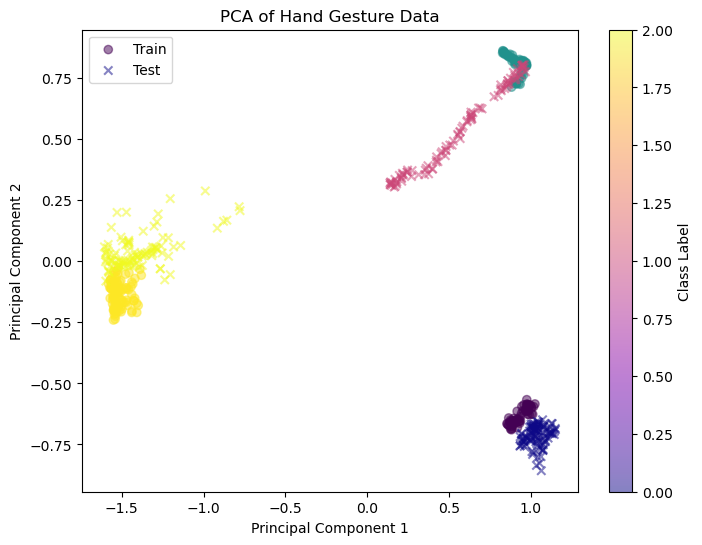

In [8]:
# Convert labels to integers for visualization purposes
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Combine train and test data for PCA
all_data = np.vstack((x_train, x_test))

# Apply PCA to reduce dimensionality to 2D

pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_data)

# Split the PCA result back into train and test sets
pca_train = pca_result[:len(x_train)]
pca_test = pca_result[len(x_train):]

# Plot the PCA result
plt.figure(figsize=(8, 6))

# Scatter plot for training data
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y_train, cmap='viridis', label='Train', alpha=0.5)
# Scatter plot for testing data
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=y_test, cmap='plasma', label='Test', alpha=0.5, marker='x')

plt.title('PCA of Hand Gesture Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Class Label')
plt.show()


we can observe that there are a lot of outliers that could lead to incorrect predictions so we will try to minimize them using SMOTE, SMOTE works by creating synthetic samples for the minority class. It does this by selecting examples that are close in the feature space and interpolating between them to create new, synthetic examples and hence cpnverting imbalance dataset to a mmore close to balanced dataset

In [20]:
pip install imbalanced-learn


Resampled class distribution: Counter({0: 100, 1: 100, 2: 100})


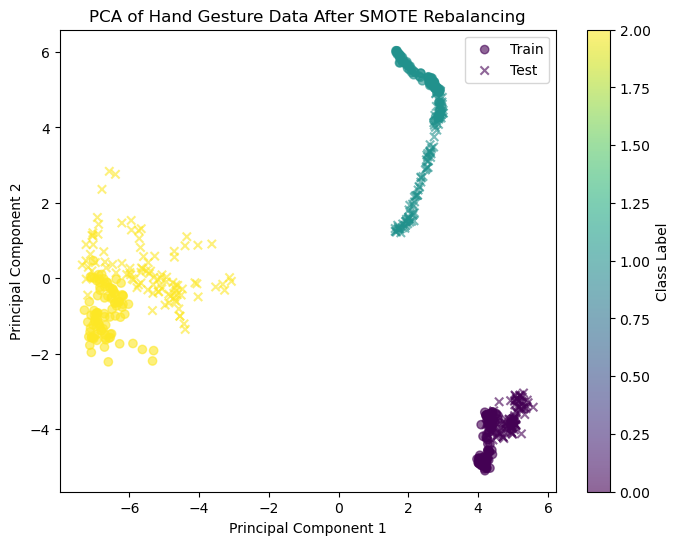

In [9]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Standardize the data before PCA
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Perform PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_resampled_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Print class distribution after SMOTE
print("Resampled class distribution:", Counter(y_train_resampled))
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.title('PCA of Hand Gesture Data After SMOTE Rebalancing')

# Plot the training data
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_resampled, cmap='viridis', alpha=0.6, marker='o', label='Train')

# Plot the test data
scatter = plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.6, marker='x', label='Test')

# Add legend and colorbar
plt.legend(['Train', 'Test'], loc='upper right')
plt.colorbar(scatter, label='Class Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Training Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



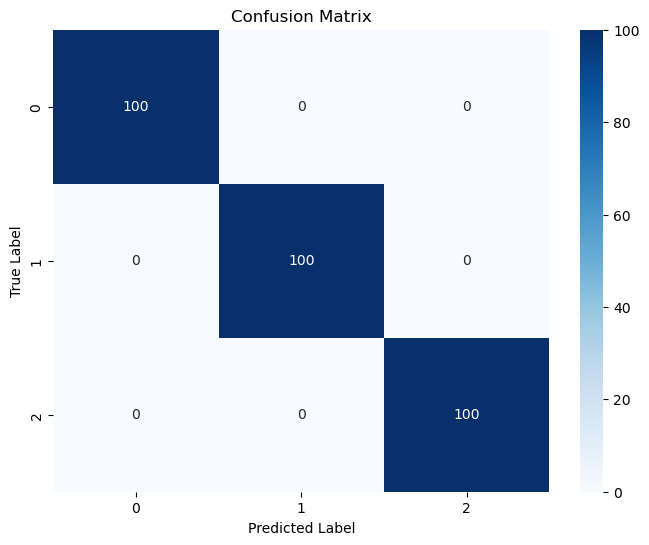

In [11]:
# Fit Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_resampled_scaled, y_train_resampled)

# Predict on test data
y_pred = rf_classifier.predict(x_test_scaled)
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Save the model to a file so we can make predictions on real life photos
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)



Now we will use our saved model to make predictions on real life images taken from testData set:

# Testing

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


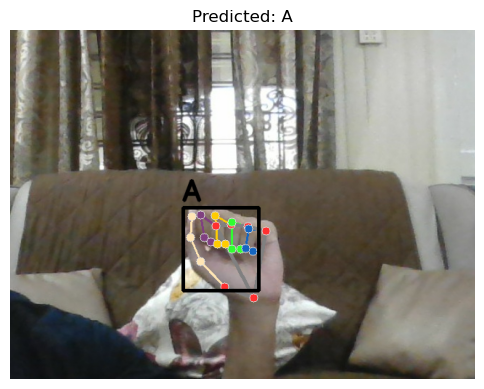

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


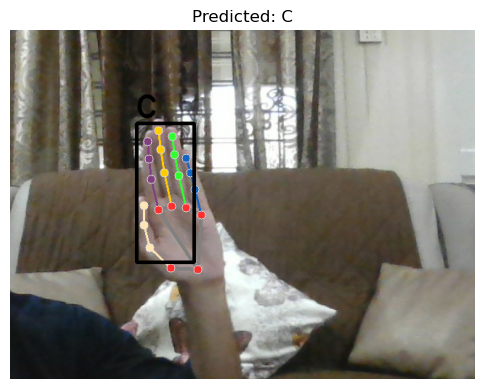

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


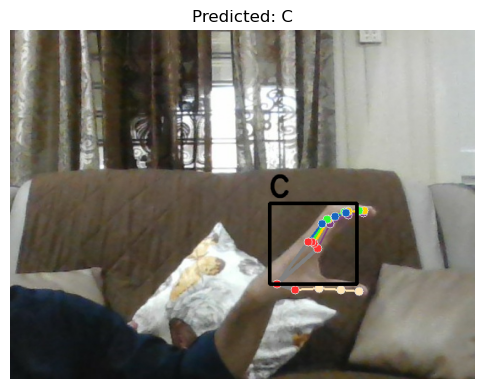

In [29]:
import os
import pickle
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

# Load the model
model = pickle.load(open('./Models/random_forest_model.pkl', 'rb'))

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: 'A', 1: 'B', 2: 'C'}

# Directory containing the test images
data_test_dir = './dataTest'

# Iterate over each subdirectory in the test data directory
for subdir in os.listdir(data_test_dir):
    subdir_path = os.path.join(data_test_dir, subdir)
    if not os.path.isdir(subdir_path):
        continue
    
    # Get the first image file in the subdirectory
    img_filenames = [f for f in os.listdir(subdir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not img_filenames:
        print(f"No images found in {subdir_path}. Skipping...")
        continue
    
    img_path = os.path.join(subdir_path, img_filenames[0])
    img = cv2.imread(img_path)

    if img is None:
        print(f"Failed to read image {img_path}. Skipping...")
        continue

    data_aux = []
    x_ = []
    y_ = []

    H, W, _ = img.shape

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = hands.process(img_rgb)
    #iterate over each landmarks belonging to each dir and make prediction
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks: 
            for landmark in hand_landmarks.landmark:
                x_.append(landmark.x)
                y_.append(landmark.y)

            min_x, max_x = min(x_), max(x_)
            min_y, max_y = min(y_), max(y_)

            for landmark in hand_landmarks.landmark:
                data_aux.append((landmark.x - min_x) / (max_x - min_x))
                data_aux.append((landmark.y - min_y) / (max_y - min_y))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        # Ensure the input data has the correct shape
        if len(data_aux) == 42:
            # Predict the class
            prediction = model.predict([np.asarray(data_aux)])

            predicted_character = labels_dict[int(prediction[0])]

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(img, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                        cv2.LINE_AA)
        else:
            print(f"Unexpected number of features: {len(data_aux)}. Expected 42.")
    
    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {predicted_character}')
    plt.axis('off')
    plt.show()

hands.close()


# BIAS AND VARIANCE CURVE

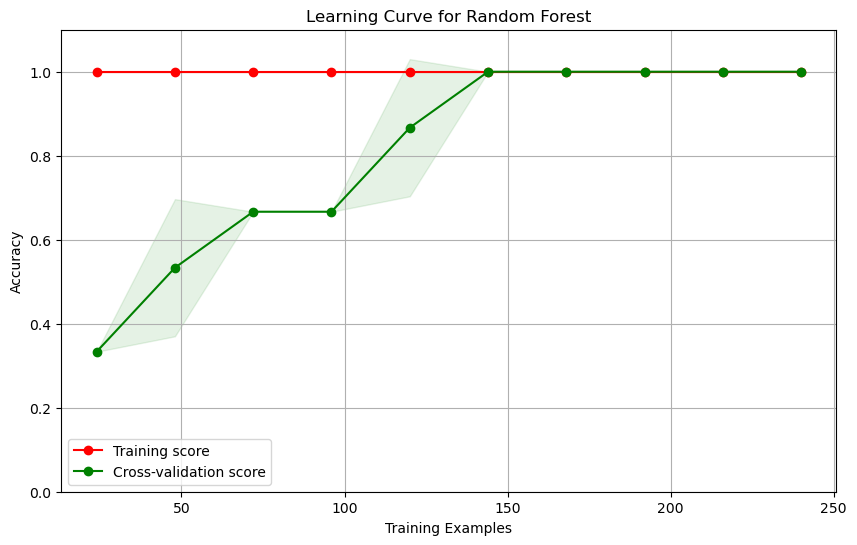

In [38]:
from sklearn.model_selection import learning_curve  # Import learning_curve from sklearn

def plot_learning_curve(estimator, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Example usage
from sklearn.ensemble import RandomForestClassifier
# Assuming x_train_resampled_scaled, y_train_resampled are already defined
rf_classifier = RandomForestClassifier(random_state=42)
plot_learning_curve(rf_classifier, x_train_resampled_scaled, y_train_resampled, title='Learning Curve for Random Forest')
plt.show()


We can clearly see that it is making wrong predictions and for all gestures it is predicting C for 2 and 3 class, that it maybe the case of overfitting because we can clearly see that our cross validation score is poor in the start that means it is not performing very at initail stage for unseen data,So we will add hyper parameters to fix this.

# HyperParameter Tunning

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from collections import Counter
import warnings

def main():
    try:
        # Assuming x_train_resampled and y_train_resampled are already defined
        # Print class distribution after SMOTE
        print("Resampled class distribution:", Counter(y_train_resampled))

        # Standardize the data before PCA
        scaler = StandardScaler()
        x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
        x_test_scaled = scaler.transform(x_test)

        # Perform Grid Search for hyperparameter tuning
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2'],
            'criterion': ['gini', 'entropy'],
            'bootstrap': [True, False]
        }

        # Suppress warnings related to failed fits during CV
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
            grid_search.fit(x_train_resampled, y_train_resampled)

        # Get the best model
        best_rf_classifier = grid_search.best_estimator_

        # Save the best model to a file
        with open('best_random_forest_model.pkl', 'wb') as file:
            pickle.dump(best_rf_classifier, file)

        # Print the best parameters found
        print("Best Parameters:", grid_search.best_params_)

        # Predict on test data using the best model
        y_pred_best = best_rf_classifier.predict(x_test_scaled)

        # Classification report
        print("Classification Report (Best Model):")
        print(classification_report(y_test, y_pred_best))

        # Confusion matrix
        cm_best = confusion_matrix(y_test, y_pred_best)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix (Best Model)')
        plt.show()

    except Exception as e:
        # Log errors to a file for debugging
        with open('error_log.txt', 'a') as f:
            f.write(f"Error occurred: {str(e)}\n")

if __name__ == "__main__":
    main()


Resampled class distribution: Counter({0: 100, 1: 100, 2: 100})
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Testing on real life dataset

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


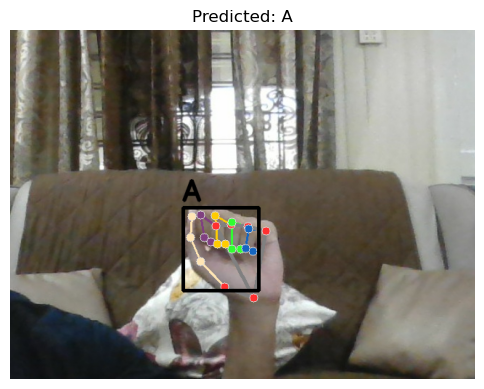

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


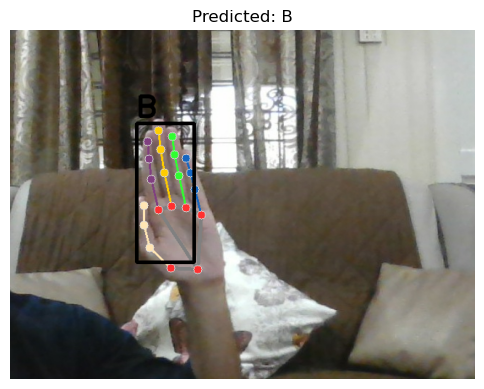

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


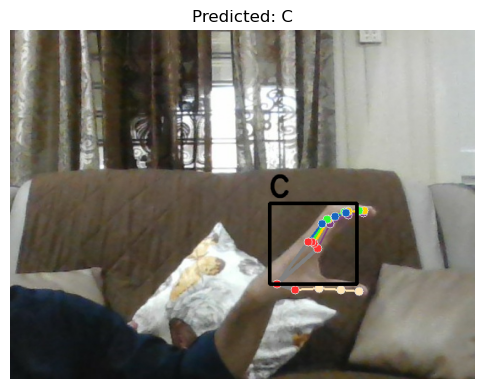

In [30]:
import os
import pickle
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

# Load the model
model = pickle.load(open('./Models/best_random_forest_model.pkl', 'rb'))

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: 'A', 1: 'B', 2: 'C'}

# Directory containing the test images
data_test_dir = './dataTest'

# Iterate over each subdirectory in the test data directory
for subdir in os.listdir(data_test_dir):
    subdir_path = os.path.join(data_test_dir, subdir)
    if not os.path.isdir(subdir_path):
        continue
    
    # Get the first image file in the subdirectory
    img_filenames = [f for f in os.listdir(subdir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not img_filenames:
        print(f"No images found in {subdir_path}. Skipping...")
        continue
    
    img_path = os.path.join(subdir_path, img_filenames[0])
    img = cv2.imread(img_path)

    if img is None:
        print(f"Failed to read image {img_path}. Skipping...")
        continue

    data_aux = []
    x_ = []
    y_ = []

    H, W, _ = img.shape

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                x_.append(landmark.x)
                y_.append(landmark.y)

            min_x, max_x = min(x_), max(x_)
            min_y, max_y = min(y_), max(y_)

            for landmark in hand_landmarks.landmark:
                data_aux.append((landmark.x - min_x) / (max_x - min_x))
                data_aux.append((landmark.y - min_y) / (max_y - min_y))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        # Ensure the input data has the correct shape
        if len(data_aux) == 42:
            # Predict the class
            prediction = model.predict([np.asarray(data_aux)])

            predicted_character = labels_dict[int(prediction[0])]

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(img, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                        cv2.LINE_AA)
        else:
            print(f"Unexpected number of features: {len(data_aux)}. Expected 42.")
    
    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {predicted_character}')
    plt.axis('off')
    plt.show()

hands.close()


Now we can see with hyper tunned params , our model has labelled all the three classes correct that means our cross validation score has improved.

# Decision Tree

In [79]:

def main():
    try:
        # Assuming x_train_resampled and y_train_resampled are already defined
        # Print class distribution after SMOTE
        print("Resampled class distribution:", Counter(y_train_resampled))

     

        # Train a Decision Tree Classifier without hyperparameter tuning
        dt_classifier = DecisionTreeClassifier(random_state=42)
        dt_classifier.fit(x_train_resampled, y_train_resampled)

        # Save the model to a file
        with open('decision_tree_model.pkl', 'wb') as file:
            pickle.dump(dt_classifier, file)

        # Predict on test data using the trained model
        y_pred = dt_classifier.predict(x_test)

        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

      

    except Exception as e:
        # Log errors to a file for debugging
        with open('error_log.txt', 'a') as f:
            f.write(f"Error occurred: {str(e)}\n")

if __name__ == "__main__":
    main()


Resampled class distribution: Counter({0: 100, 1: 100, 2: 100})
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       100
           1       0.90      1.00      0.95       100
           2       1.00      1.00      1.00       100

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300



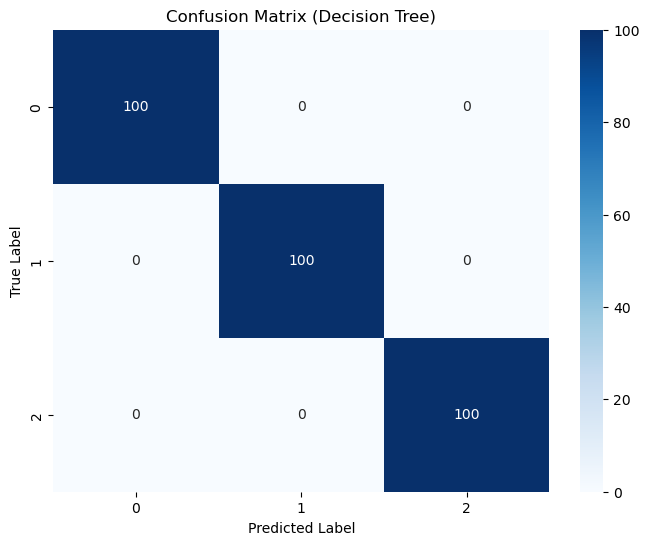

In [81]:
model = pickle.load(open('./decision_tree_model.pkl', 'rb'))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# Plot learning curve
title = "Learning Curves (Decision Tree)"
cv = 10  # Cross-validation strategy
plot_learning_curve(model, title, x_train_resampled, y_train_resampled, cv=cv)
plt.show()

Though our scores are pretty good but our cross validation score is bad halfway in testing that means high variance so we will use hyper params to fix that

# Making Prediction

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


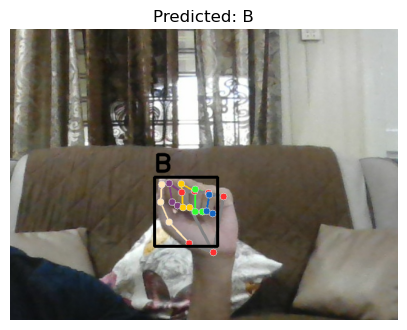

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


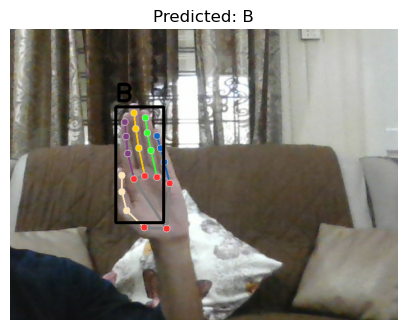

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


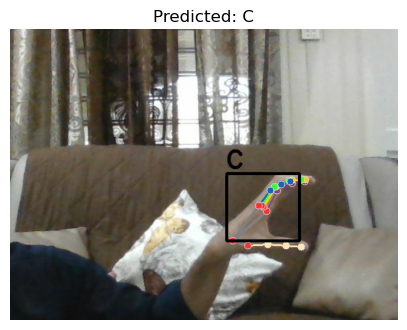

In [75]:
# Load the model
model = pickle.load(open('./decision_tree_model.pkl', 'rb'))

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: 'A', 1: 'B', 2: 'C'}

# Directory containing the test images
data_test_dir = './Models/dataTest'

# Iterate over each subdirectory in the test data directory
for subdir in os.listdir(data_test_dir):
    subdir_path = os.path.join(data_test_dir, subdir)
    if not os.path.isdir(subdir_path):
        continue
    
    # Get the first image file in the subdirectory
    img_filenames = [f for f in os.listdir(subdir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not img_filenames:
        print(f"No images found in {subdir_path}. Skipping...")
        continue
    
    img_path = os.path.join(subdir_path, img_filenames[0])
    img = cv2.imread(img_path)

    if img is None:
        print(f"Failed to read image {img_path}. Skipping...")
        continue

    data_aux = []
    x_ = []
    y_ = []

    H, W, _ = img.shape

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                x_.append(landmark.x)
                y_.append(landmark.y)

            min_x, max_x = min(x_), max(x_)
            min_y, max_y = min(y_), max(y_)

            for landmark in hand_landmarks.landmark:
                data_aux.append((landmark.x - min_x) / (max_x - min_x))
                data_aux.append((landmark.y - min_y) / (max_y - min_y))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        # Ensure the input data has the correct shape
        if len(data_aux) == 42:
            # Predict the class
            prediction = model.predict([np.asarray(data_aux)])

            predicted_character = labels_dict[int(prediction[0])]

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(img, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                        cv2.LINE_AA)
        else:
            print(f"Unexpected number of features: {len(data_aux)}. Expected 42.")
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {predicted_character}')
    plt.axis('off')
    plt.show()

hands.close()


It has totally made wrong prediction for A meaning it needs fine hyperparameteric tunning to improve cross validation

# Hyperparameter Tunning

In [ ]:
# def main():
    try:
        # Assuming x_train_resampled and y_train_resampled are already defined
        # Print class distribution after SMOTE
        print("Resampled class distribution:", Counter(y_train_resampled))

        # Perform Grid Search for hyperparameter tuning
        param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'class_weight': ['balanced', None]
        }

        # Suppress warnings related to failed fits during CV
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
            grid_search.fit(x_train_resampled, y_train_resampled)

        # Get the best model
        best_dt_classifier = grid_search.best_estimator_

        # Save the best model to a file
        with open('best_decision_tree_model_ror.pkl', 'wb') as file:
            pickle.dump(best_dt_classifier, file)

        # Print the best parameters found
        print("Best Parameters:", grid_search.best_params_)

        # Predict on test data using the best model
        y_pred_best = best_dt_classifier.predict(x_test)

        # Classification report
        print("Classification Report (Best Model):")
        print(classification_report(y_test, y_pred_best))

        # Confusion matrix
        cm_best = confusion_matrix(y_test, y_pred_best)

        

    except Exception as e:
        # Log errors to a file for debugging
        with open('error_log.txt', 'a') as f:
            f.write(f"Error occurred: {str(e)}\n")

if __name__ == "__main__":
    main()


The scores has improved by little now we will verify it by make predictions if they are enough or not

# Making Prediction

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


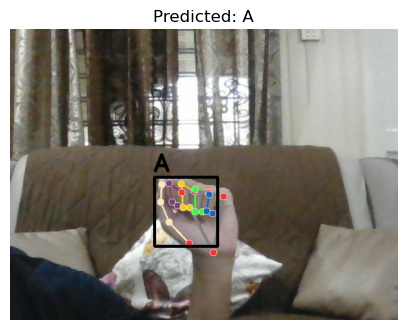

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


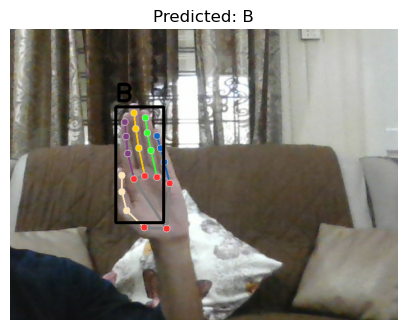

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


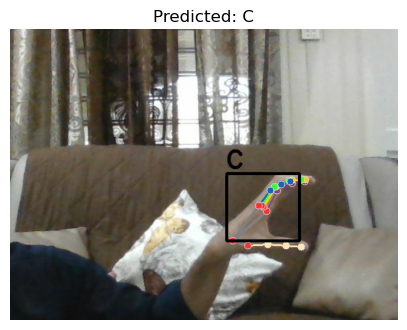

In [89]:
# Load the model
model = pickle.load(open('./Models/best_decision_tree_model_ror.pkl', 'rb'))

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: 'A', 1: 'B', 2: 'C'}

# Directory containing the test images
data_test_dir = './dataTest'

# Iterate over each subdirectory in the test data directory
for subdir in os.listdir(data_test_dir):
    subdir_path = os.path.join(data_test_dir, subdir)
    if not os.path.isdir(subdir_path):
        continue
    
    # Get the first image file in the subdirectory
    img_filenames = [f for f in os.listdir(subdir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not img_filenames:
        print(f"No images found in {subdir_path}. Skipping...")
        continue
    
    img_path = os.path.join(subdir_path, img_filenames[0])
    img = cv2.imread(img_path)

    if img is None:
        print(f"Failed to read image {img_path}. Skipping...")
        continue

    data_aux = []
    x_ = []
    y_ = []

    H, W, _ = img.shape

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                x_.append(landmark.x)
                y_.append(landmark.y)

            min_x, max_x = min(x_), max(x_)
            min_y, max_y = min(y_), max(y_)

            for landmark in hand_landmarks.landmark:
                data_aux.append((landmark.x - min_x) / (max_x - min_x))
                data_aux.append((landmark.y - min_y) / (max_y - min_y))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        # Ensure the input data has the correct shape
        if len(data_aux) == 42:
            # Predict the class
            prediction = model.predict([np.asarray(data_aux)])

            predicted_character = labels_dict[int(prediction[0])]

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(img, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                        cv2.LINE_AA)
        else:
            print(f"Unexpected number of features: {len(data_aux)}. Expected 42.")
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {predicted_character}')
    plt.axis('off')
    plt.show()

hands.close()


Now with tunned decision tree the model is making correct predictions on training data set

# KNN

In [15]:
import pickle
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def main():
    try:
       
        print("Resampled class distribution:", Counter(y_train_resampled))

        # Train a K-Nearest Neighbors Classifier without hyperparameter tuning
        knn_classifier = KNeighborsClassifier()
        knn_classifier.fit(x_train_resampled, y_train_resampled)

        # Save the model to a file
        with open('knn_model.pkl', 'wb') as file:
            pickle.dump(knn_classifier, file)

        # Predict on test data using the trained model
        y_pred = knn_classifier.predict(x_test)

        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

    except Exception as e:
        # Log errors to a file for debugging
        with open('error_log.txt', 'a') as f:
            f.write(f"Error occurred: {str(e)}\n")

if __name__ == "__main__":
    main()


Resampled class distribution: Counter({0: 100, 1: 100, 2: 100})
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


# Making Prediction

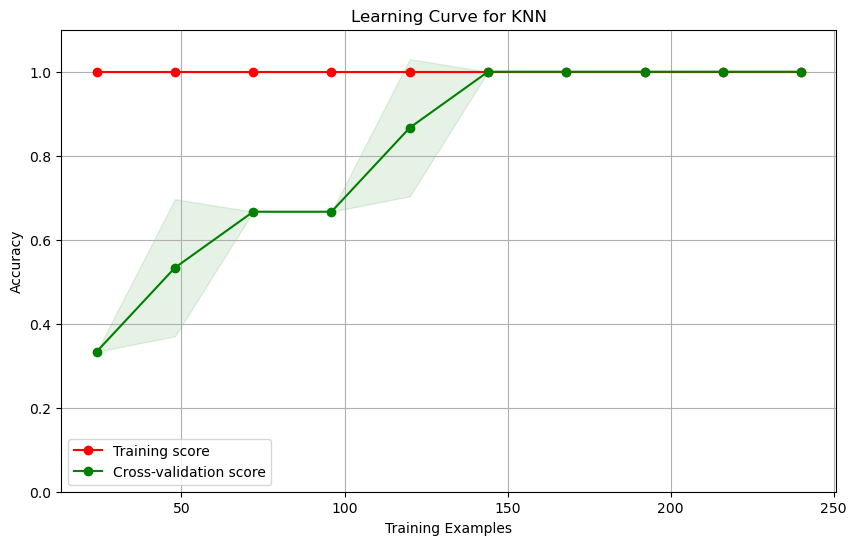

In [22]:
model = pickle.load(open('./Models/knn_model.pkl', 'rb'))
from sklearn.model_selection import learning_curve  # Import learning_curve from sklearn
def plot_learning_curve(estimator, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(model, x_train_resampled, y_train_resampled, title='Learning Curve for KNN')
plt.show()


# Testing

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


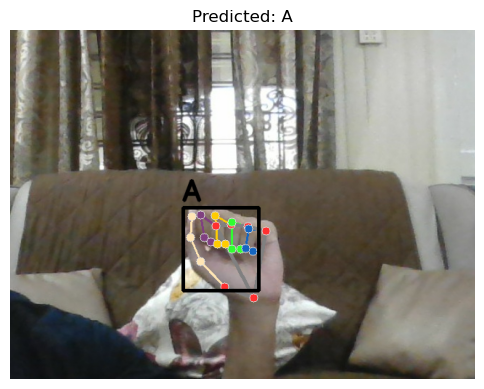

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


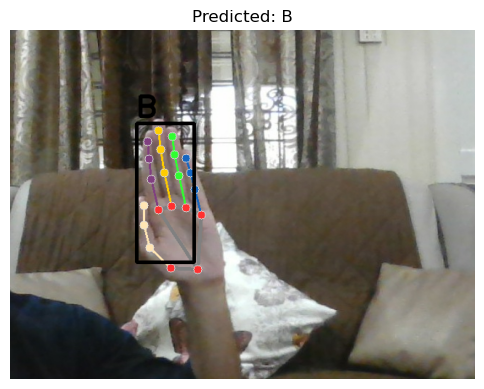

C:\Users\PMLS\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


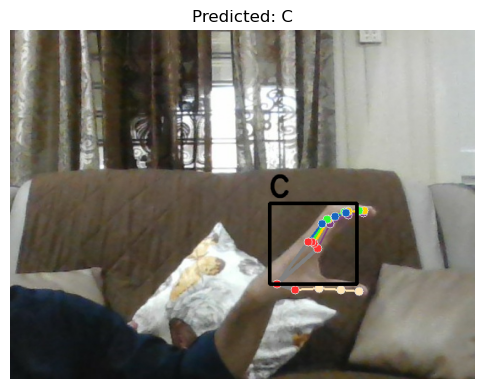

In [25]:

# Load the model
model = pickle.load(open('./Models/knn_model.pkl', 'rb'))

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: 'A', 1: 'B', 2: 'C'}

# Directory containing the test images
data_test_dir = './dataTest'

# Iterate over each subdirectory in the test data directory
for subdir in os.listdir(data_test_dir):
    subdir_path = os.path.join(data_test_dir, subdir)
    if not os.path.isdir(subdir_path):
        continue
    
    # Get the first image file in the subdirectory
    img_filenames = [f for f in os.listdir(subdir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not img_filenames:
        print(f"No images found in {subdir_path}. Skipping...")
        continue
    
    img_path = os.path.join(subdir_path, img_filenames[0])
    img = cv2.imread(img_path)

    if img is None:
        print(f"Failed to read image {img_path}. Skipping...")
        continue

    data_aux = []
    x_ = []
    y_ = []

    H, W, _ = img.shape

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                x_.append(landmark.x)
                y_.append(landmark.y)

            min_x, max_x = min(x_), max(x_)
            min_y, max_y = min(y_), max(y_)

            for landmark in hand_landmarks.landmark:
                data_aux.append((landmark.x - min_x) / (max_x - min_x))
                data_aux.append((landmark.y - min_y) / (max_y - min_y))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        # Ensure the input data has the correct shape
        if len(data_aux) == 42:
            # Predict the class
            prediction = model.predict([np.asarray(data_aux)])

            predicted_character = labels_dict[int(prediction[0])]

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(img, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                        cv2.LINE_AA)
        else:
            print(f"Unexpected number of features: {len(data_aux)}. Expected 42.")
    
    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted: {predicted_character}')
    plt.axis('off')
    plt.show()

hands.close()


We can see that the cross validation score was mid untill the middle of testing and improved with time and but when we made predictions all were correct

# Hyper Tunning

In [26]:
from sklearn.model_selection import GridSearchCV

def main():
    try:
        # Assuming y_train_resampled and x_train_resampled are defined elsewhere in your code
        print("Resampled class distribution:", Counter(y_train_resampled))

        # Define parameter grid for GridSearchCV
        param_grid = {
            'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }

        # Initialize the KNN classifier
        knn = KNeighborsClassifier()

        # Initialize GridSearchCV with KNN and parameter grid
        grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

        # Fit GridSearchCV to the resampled training data
        grid_search.fit(x_train_resampled, y_train_resampled)

        # Get the best parameters
        best_params = grid_search.best_params_
        print("Best Parameters:", best_params)

        # Train the final model with the best parameters
        knn_classifier = KNeighborsClassifier(**best_params)
        knn_classifier.fit(x_train_resampled, y_train_resampled)

        # Save the model to a file
        with open('best_knn_model.pkl', 'wb') as file:
            pickle.dump(knn_classifier, file)

        # Predict on test data using the trained model
        y_pred = knn_classifier.predict(x_test)

        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

    except Exception as e:
        # Log errors to a file for debugging
        with open('error_log.txt', 'a') as f:
            f.write(f"Error occurred: {str(e)}\n")

if __name__ == "__main__":
    main()


Resampled class distribution: Counter({0: 100, 1: 100, 2: 100})
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


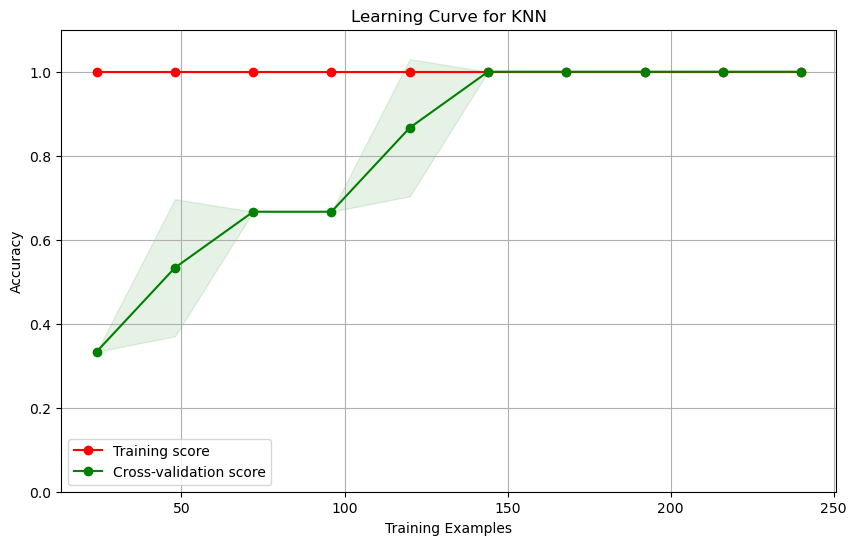

In [27]:
model = pickle.load(open('./Models/best_knn_model.pkl', 'rb'))
from sklearn.model_selection import learning_curve  # Import learning_curve from sklearn
def plot_learning_curve(estimator, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(model, x_train_resampled, y_train_resampled, title='Learning Curve for KNN')
plt.show()


To move the cross validation curve a little more than normal we will need to add great number of hyper parameters with others methods as well that will require more resources but since our model is already predicting good on test data we will leave it here

# Fin.